# Investigation of condition number for approximation matricies

Copyright 2025 Stephan Kulla ("Kulla")

Licensed under the Apache License, Version 2.0 (the "Apache License") and Creative Commons Attribution 4.0 International (the "CC-BY License"). You may choose either of these licenses to govern your use of this project.

You may obtain a copy of the Apache License at:
    http://www.apache.org/licenses/LICENSE-2.0

You may obtain a copy of the CC-BY License at:
    https://creativecommons.org/licenses/by/4.0/

Unless required by applicable law or agreed to in writing, software and content distributed under the Apache License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the Apache License for the specific language governing permissions and limitations under the License.

Under the CC-BY License, you are free to share and adapt the material provided you give appropriate credit, provide a link to the license, and indicate if changes were made. See the CC-BY License for full details.

Third-Party Components and Licenses:
This product also includes third-party components which are distributed under their respective licenses. Please refer to the NOTICE file for details.

## Utility functions and imports

In [1]:
%load_ext jupyter_ai_magics

In [2]:
import string
import sympy as sp

from IPython.display import display, Markdown

class LatexFormatter(string.Formatter):
    def format_field(self, value, format_spec):
        if format_spec == 'tex':
            return sp.printing.latex(value)
        if format_spec == '$' or format_spec == 'inline':
            return "$" + sp.printing.latex(value) + "$"
        elif format_spec == '$$' or format_spec == 'block':
            return "$$" + sp.printing.latex(value) + "$$"
        else:
            return super().format_field(value, format_spec)

def disp_md(template, **kwargs):
    display(Markdown(LatexFormatter().format(template, **kwargs)))

## Investigate the condition number of a matrix

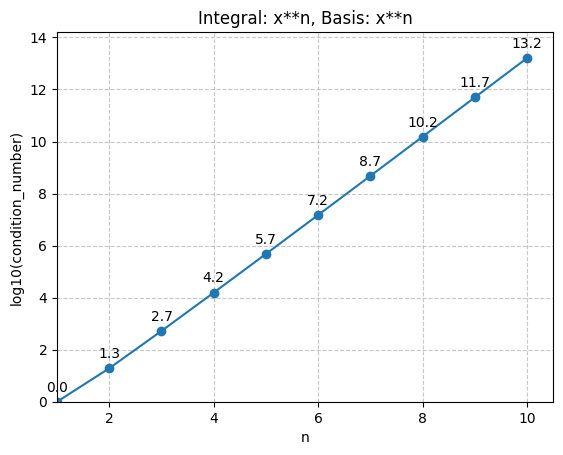

In [35]:
import matplotlib.pyplot as plt
import numpy as np

from functools import partial
from sympy.abc import x, n
from src.c_space import derivative_forms, integral_forms, vectors
from src.approximation import matrix_of

def condition_number(sp_matrix, p=2):
    np_matrix = np.array(sp_matrix).astype(np.float64)

    return np.log10(np.linalg.cond(np_matrix, p=p))

def investigate_condition_number(linear_forms, vectors, title, p=2, max_number=10):
    def get_condition_number(n):
        return condition_number(matrix_of(linear_forms(n), vectors(n)), p=p)
    
    ns = range(1, max_number+1)
    condition_numbers = [get_condition_number(n) for n in ns]

    plt.plot(ns, condition_numbers, "-o")
    plt.xlim((1, max_number + 0.5))
    plt.ylim((0, max(condition_numbers)+1))
    plt.xlabel("n")
    plt.ylabel("log10(condition_number)")
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.7)

    for i, value in enumerate(condition_numbers):
        plt.text(ns[i], value + 0.4, f'{value:.1f}', ha='center')

    plt.show()

investigate_condition_number(partial(integral_forms, x**n), partial(vectors, x**n), "Integral: x**n, Basis: x**n")